In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

data = pd.read_csv('train.csv')


In [3]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = data['SalePrice']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)


In [7]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)


Mean Squared Error: 2810942965.2180653
R-squared: 0.6335301929422245


In [8]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [   101.73256593 -26704.0146758   30848.02847147   4611.65326359]
Intercept: 52830.652788360865


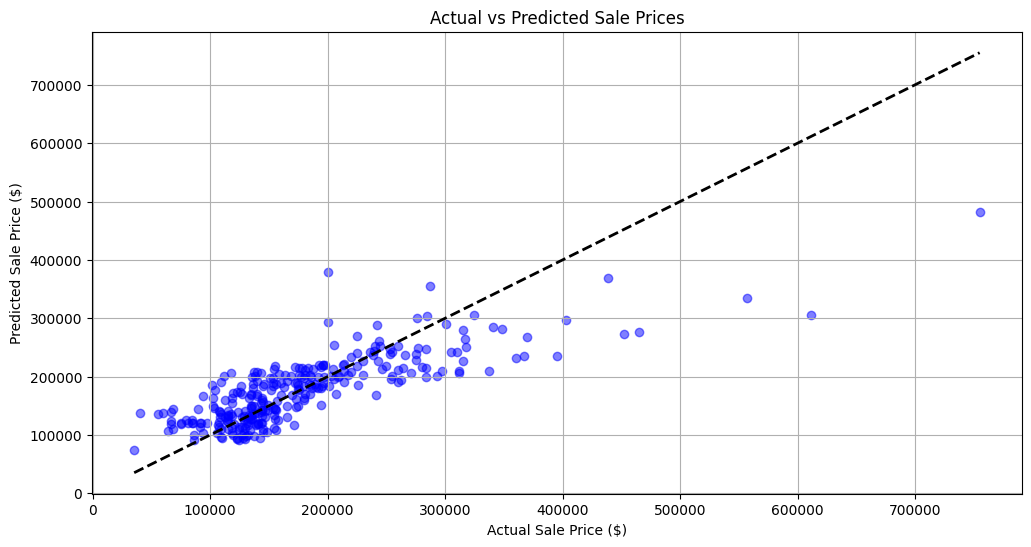

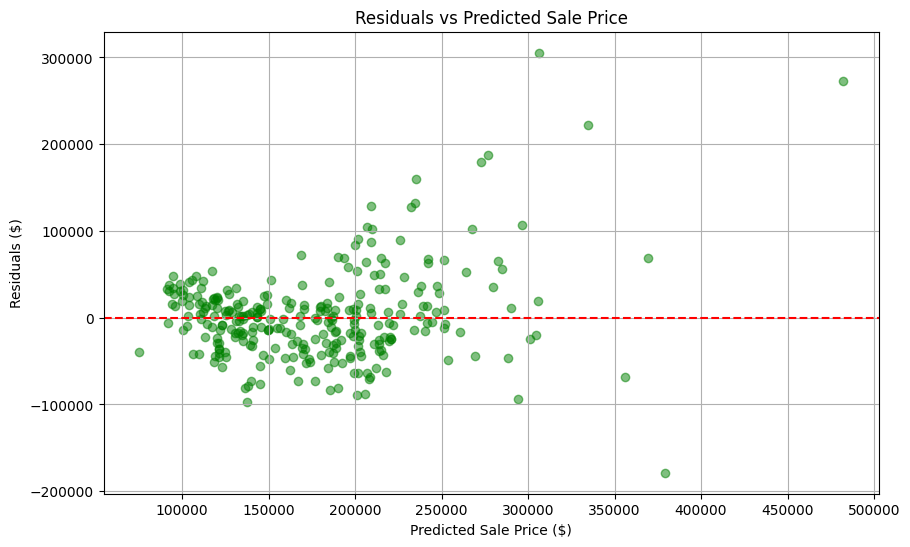

In [24]:
import matplotlib.pyplot as plt

# Make predictions on the test set using the trained model
y_pred_test = model.predict(X_test)

# Plot actual vs predicted sale prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.title('Actual vs Predicted Sale Prices')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals vs Predicted Sale Price')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


In [11]:


# Read the test dataset into a pandas DataFrame
test_data = pd.read_csv('test.csv')

# Select the features from the test dataset
X_test = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Make predictions on the test set using the trained model
predicted_prices = model.predict(X_test)

# Add the predicted prices to the test dataset
test_data['PredictedSalePrice'] = predicted_prices

# Print the test dataset with predicted sale prices
print(test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'PredictedSalePrice']])


      GrLivArea  BedroomAbvGr  FullBath  HalfBath  PredictedSalePrice
0           896             2         1         0       121423.030985
1          1329             3         1         1       143380.870622
2          1629             3         2         1       204748.668874
3          1604             3         2         1       202205.354725
4          1280             2         2         0       191336.364775
...         ...           ...       ...       ...                 ...
1454       1092             3         1         1       119270.252496
1455       1092             3         1         1       119270.252496
1456       1224             4         1         0       101383.283260
1457        970             3         1         0       102247.226188
1458       2000             3         2         1       242491.450835

[1459 rows x 5 columns]
